In [15]:
from scipy.stats import gmean
from glob import glob
import glob
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
import pandas as pd
import numpy as np
import msgpack
import os



pd.set_option("display.max_colwidth", None)


## NSGA-II Sensitivity Analysis

In [16]:


def read_results(path):
    data = []
    for algorithm_path in glob.glob(path):
        # Extraia o nome do algoritmo após o sinal de igual e capitaliza a primeira letra
        algorithm_name = algorithm_path.split('/')[-1].split('=')[-1].capitalize()
        for log in glob.glob(algorithm_path + "/*"):
            if "Topology" in log:
                with open(log, "rb") as f:
                    all_metrics = msgpack.load(f, strict_map_key=False)
                    for step, metrics in enumerate(all_metrics):
                        metrics["algorithm"] = algorithm_name
                        metrics["step"] = step
                        data.append(metrics)
    return data

data = read_results("logs/*")




In [17]:
df = pd.DataFrame(data)
df = df[["algorithm", "step", "overall_occupation", "overall_power_consumption", "delay_sla_violations", "privacy_sla_violations"]]
# Calcular a coluna de custo usando a média geométrica
df["Cost"] = df[["overall_power_consumption", "delay_sla_violations", "privacy_sla_violations"]].apply(gmean, axis=1)
df


,algorithm,step,overall_occupation,overall_power_consumption,delay_sla_violations,privacy_sla_violations,Cost
0,Dcf;,0,0.000000,2622.000000,24,0,0.000000
1,Dcf;,1,87.200847,13332.000000,24,34,221.578944
2,Dcf;,2,87.200847,13332.000000,24,34,221.578944
3,Dcf;,3,87.200847,13332.000000,24,34,221.578944
4,Dcf;,4,87.200847,13332.000000,24,34,221.578944
...,...,...,...,...,...,...,...
500,Spp;,96,86.900144,13305.000000,24,55,259.933908
501,Spp;,97,86.884637,13307.583333,24,56,261.516736
502,Spp;,98,86.900144,13305.000000,24,55,259.933908
503,Spp;,99,86.884637,13307.583333,24,56,261.516736


## media

In [18]:

# Filtrar as linhas onde step é diferente de 0
df_filtered = df[df["step"] != 0]

# Agrupar por algoritmo e calcular a média de cada coluna
average_df = df_filtered.groupby("algorithm").mean()

# Exibir o DataFrame resultante
print(average_df)

                step  overall_occupation  overall_power_consumption  \
algorithm                                                             
Argos;          50.5           87.200847               13332.000000   
Dcf;            50.5           87.200847               13332.000000   
Faticanti2020;  50.5           87.200847               13332.000000   
Spp;            50.5           86.834763               13286.794167   
Thea;           50.5           87.200847               13332.000000   

                delay_sla_violations  privacy_sla_violations        Cost  
algorithm                                                                 
Argos;                          24.0                   39.00  231.947868  
Dcf;                            24.0                   34.00  221.578944  
Faticanti2020;                  24.0                   47.00  246.832003  
Spp;                            24.0                   56.07  261.483219  
Thea;                           24.0                

## mediana

In [19]:
# Agrupar por algoritmo e calcular a mediana de cada coluna
median_df = df_filtered.groupby("algorithm").median()

# Exibir o DataFrame resultante
print(median_df)

                step  overall_occupation  overall_power_consumption  \
algorithm                                                             
Argos;          50.5           87.200847               13332.000000   
Dcf;            50.5           87.200847               13332.000000   
Faticanti2020;  50.5           87.200847               13332.000000   
Spp;            50.5           86.826767               13281.520833   
Thea;           50.5           87.200847               13332.000000   

                delay_sla_violations  privacy_sla_violations        Cost  
algorithm                                                                 
Argos;                          24.0                    39.0  231.947868  
Dcf;                            24.0                    34.0  221.578944  
Faticanti2020;                  24.0                    47.0  246.832003  
Spp;                            24.0                    56.0  261.499813  
Thea;                           24.0                

## Desvio

In [20]:
# Filtrar as linhas onde step é diferente de 0
df_filtered = df[df["step"] != 0]

# Agrupar por algoritmo e calcular o desvio padrão de cada coluna
std_df = df_filtered.groupby("algorithm").std()

# Exibir o DataFrame resultante
print(std_df)

                     step  overall_occupation  overall_power_consumption  \
algorithm                                                                  
Argos;          29.011492            0.000000                    0.00000   
Dcf;            29.011492            0.000000                    0.00000   
Faticanti2020;  29.011492            0.000000                    0.00000   
Spp;            29.011492            0.051715                   18.29297   
Thea;           29.011492            0.000000                    0.00000   

                delay_sla_violations  privacy_sla_violations      Cost  
algorithm                                                               
Argos;                           0.0                0.000000  0.000000  
Dcf;                             0.0                0.000000  0.000000  
Faticanti2020;                   0.0                0.000000  0.000000  
Spp;                             0.0                0.819645  1.298635  
Thea;                        

## quartis

In [21]:
# Selecionar as colunas de interesse
df = df[["algorithm", "step", "overall_occupation", "overall_power_consumption", "delay_sla_violations", "privacy_sla_violations"]]

# Calcular a coluna de custo usando a média geométrica
df["Cost"] = df[["overall_power_consumption", "delay_sla_violations", "privacy_sla_violations"]].apply(gmean, axis=1)

# Filtrar as linhas onde step é diferente de 0
df_filtered = df[df["step"] != 0]

# Definir os quantis que queremos calcular
quantiles = [0.25, 0.5, 0.75]

# Agrupar por algoritmo e calcular os quartis
quartiles_df = df_filtered.groupby("algorithm").quantile(quantiles).unstack(level=-1)

# Renomear as colunas para refletir os quartis
quartiles_df.columns = ['{}_Q{}'.format(col, int(q*100)) for col, q in quartiles_df.columns]

# Exibir o DataFrame resultante
print(quartiles_df)

                step_Q25  step_Q50  step_Q75  overall_occupation_Q25  \
algorithm                                                              
Argos;             25.75      50.5     75.25               87.200847   
Dcf;               25.75      50.5     75.25               87.200847   
Faticanti2020;     25.75      50.5     75.25               87.200847   
Spp;               25.75      50.5     75.25               86.811261   
Thea;              25.75      50.5     75.25               87.200847   

                overall_occupation_Q50  overall_occupation_Q75  \
algorithm                                                        
Argos;                       87.200847               87.200847   
Dcf;                         87.200847               87.200847   
Faticanti2020;               87.200847               87.200847   
Spp;                         86.826767               86.884637   
Thea;                        87.200847               87.200847   

                overall_power_co

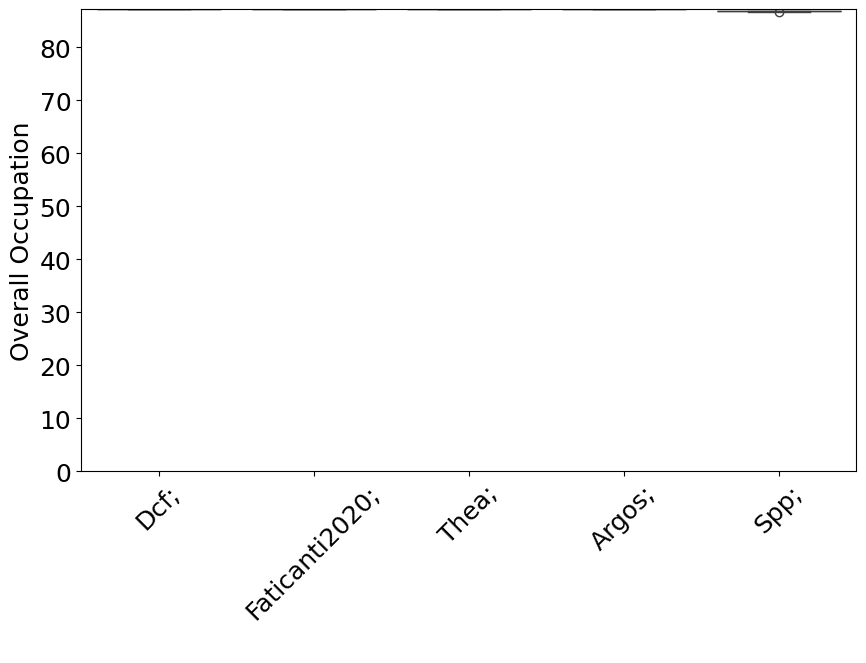

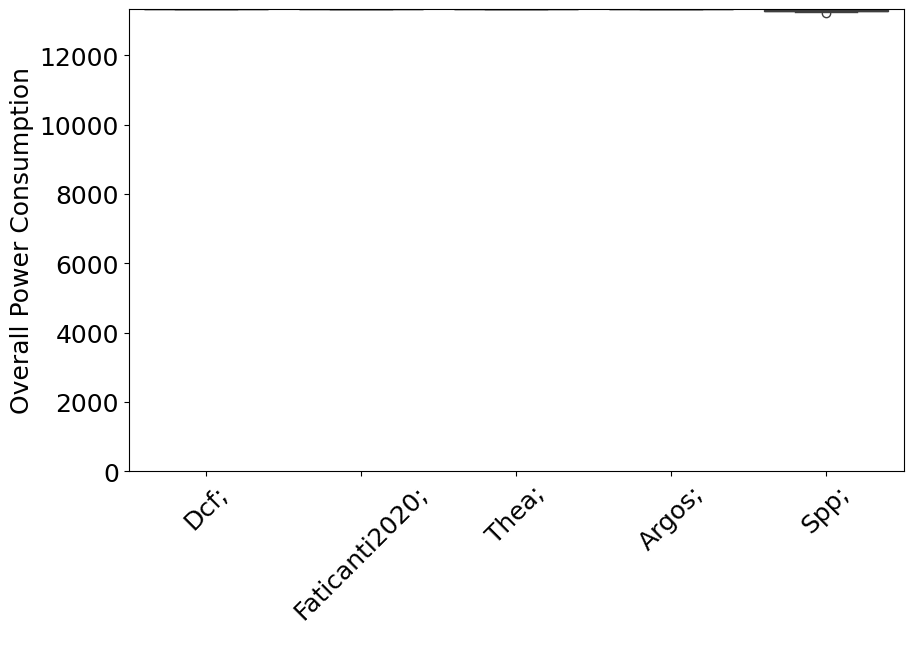

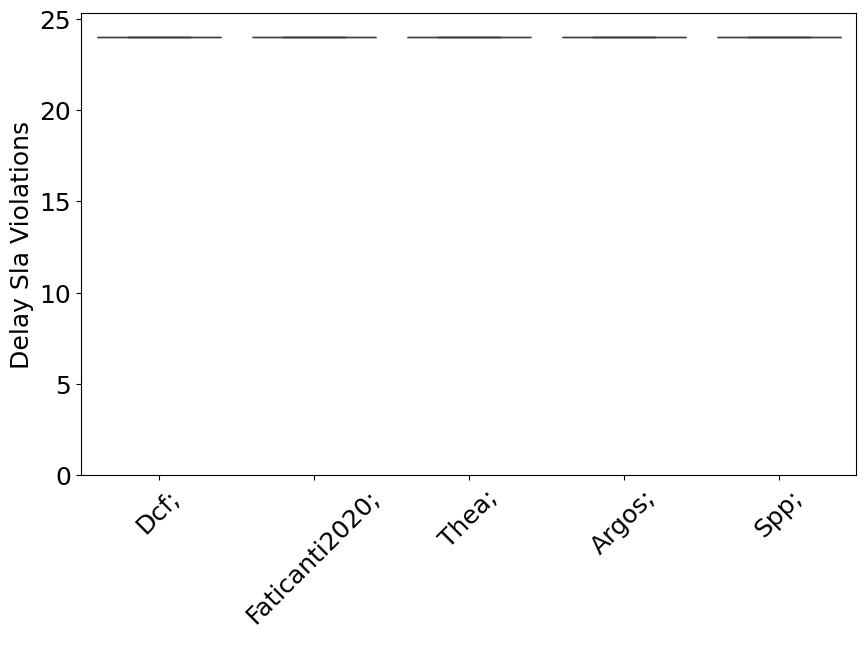

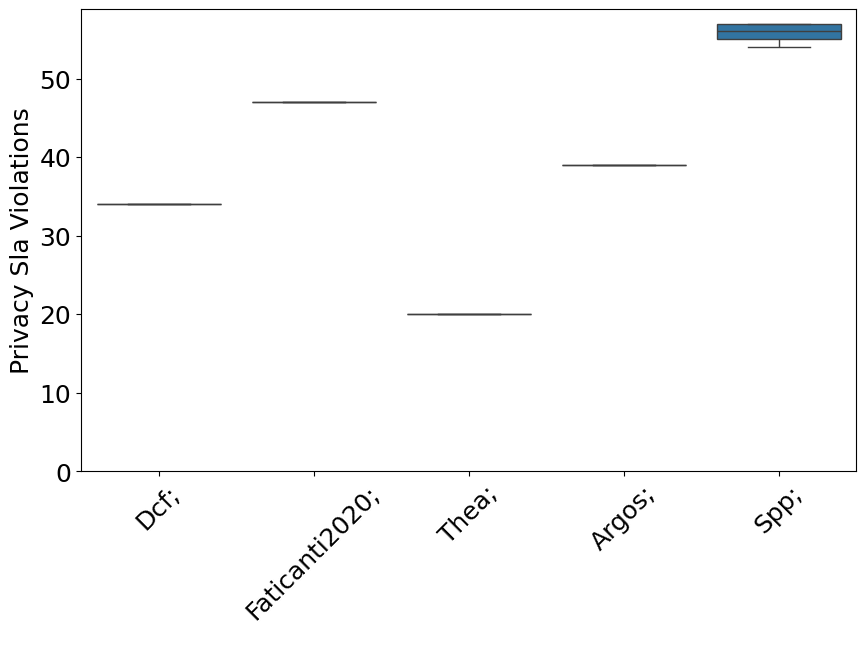

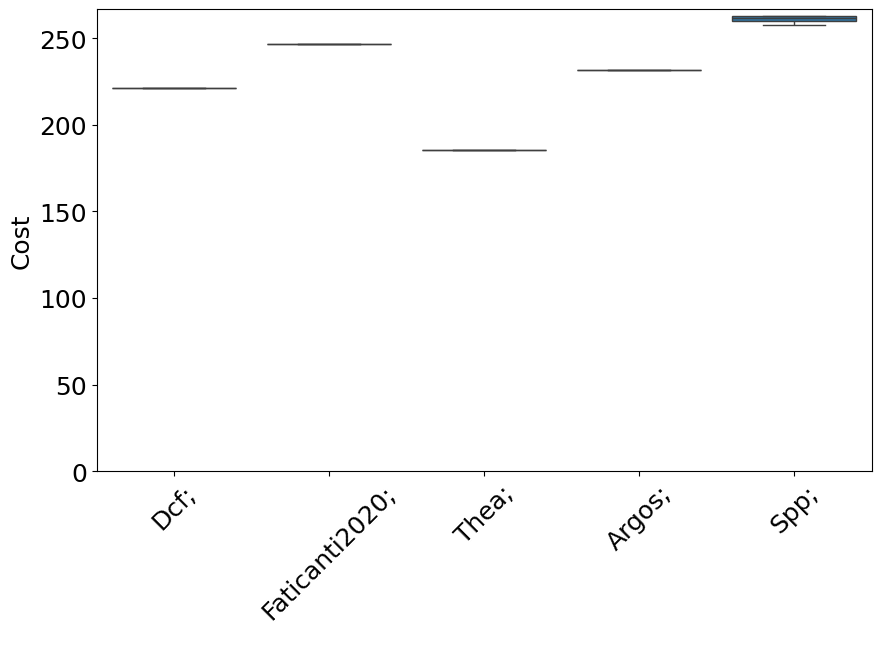

In [22]:
matplotlib.rc('font', size=18)  # Tamanho geral da fonte
matplotlib.rc('axes', titlesize=18)  # Tamanho da fonte para os títulos dos eixos
matplotlib.rc('axes', labelsize=18)  # Tamanho da fonte para os rótulos dos eixos
matplotlib.rc('xtick', labelsize=18)  # Tamanho da fonte para os rótulos do eixo x
matplotlib.rc('ytick', labelsize=18)  # Tamanho da fonte para os rótulos do eixo y
matplotlib.rc('legend', fontsize=18)  # Tamanho da fonte para a legenda
matplotlib.rc('figure', titlesize=18)
# Selecione as colunas relevantes
columns_to_plot = ["overall_occupation", "overall_power_consumption", "delay_sla_violations", "privacy_sla_violations"]

# Calcule a coluna "Cost"
df["cost"] = df[["overall_power_consumption", "delay_sla_violations", "privacy_sla_violations"]].apply(gmean, axis=1)

# Adicione "Cost" às colunas a serem plotadas
columns_to_plot.append("cost")

# Filtre o DataFrame para remover os steps 0 de cada algoritmo
df_filtered = df[df["step"] != 0]

# Defina o diretório de saída e crie se não existir
output_dir = '/home/pandini/Desktop/thea/thea/imagens_dataset2'
if not os.path.exists(output_dir):
    os.makedirs(output_dir)

# Itere sobre as colunas relevantes e crie um boxplot para cada uma
for column in columns_to_plot:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x='algorithm', y=column, data=df_filtered)
    plt.xlabel(' ')
    plt.ylabel(column.replace("_", " ").title())
    plt.xticks(rotation=45)
    
    # Defina o limite do eixo Y começando em 0
    plt.ylim(bottom=0)
    
    # Salva o plot
    file_name = f'{column}.png'
    file_path = os.path.join(output_dir, file_name)
    plt.savefig(file_path, bbox_inches='tight')
    
    # Mostre o plot (removido plt.show() para evitar pausar o script)
    plt.show()
    
    # Fecha a figura para liberar a memória
    plt.close()

In [ ]:
import matplotlib.pyplot as plt

# Plotando o gráfico de linha para 'overall_occupation' ao longo dos passos da simulação
plt.figure(figsize=(10, 6))
for alg in df["algorithm"].unique():
    df_alg = df[df["algorithm"] == alg]
    plt.plot(df_alg["step"].values, df_alg["overall_occupation"].values, label=alg)

plt.xlabel("Step")
plt.ylabel("Overall Occupation")
plt.title("Overall Occupation over Simulation Steps")
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
# Define o diretório onde os plots serão salvos
import os
output_dir = '/home/pandini/Desktop/thea/thea/imagens_dataset2'  # Altere este caminho para o diretório desejado
if not os.path.exists(output_dir):
    os.makedirs(output_dir)

# Lista das colunas exceto "step" e "step_group", com substituição de "_" por espaço
columns_to_plot_original = [col for col in df.columns if col not in ['step', 'step_group', 'algorithm', 'algorithm_name']]
columns_to_plot_display = [col.replace('_', ' ') for col in columns_to_plot_original]

# Determina os limites dos grupos
min_step = df['step'].min()
max_step = df['step'].max()
step_bins = range(min_step, max_step + 10, 10)  # Ajustado para garantir que o valor máximo esteja incluído

# Para cada algoritmo, cria os boxplots
for algorithm in df['algorithm'].unique():
    # Extrai o nome do algoritmo após o sinal de "=" e capitaliza a primeira letra
    algorithm_name = algorithm.split('=')[1].strip().capitalize()
    df_algorithm = df[df['algorithm'] == algorithm]
    df_algorithm.loc[:, 'step_group'] = pd.cut(df_algorithm['step'], bins=step_bins, right=False)
    
    for original_col, display_col in zip(columns_to_plot_original, columns_to_plot_display):
        plt.figure(figsize=(10, 6))
        sns.boxplot(x="step_group", y=original_col, data=df_algorithm)
        plt.title(f'{display_col} {algorithm_name}')
        plt.xlabel('Grupo de etapas')
        plt.ylabel(display_col)
        plt.grid(True)  # Adiciona o grid
        plt.xticks(rotation=45)  # Rotaciona os rótulos do eixo x para facilitar a leitura
        
        # Define o caminho completo do arquivo de saída
        file_name = f'{display_col}_{algorithm_name}.png'.replace(' ', '_')
        file_path = os.path.join(output_dir, file_name)
        
        # Salva o plot
        plt.savefig(file_path, bbox_inches='tight')
        plt.close()


In [ ]:
def plot_metric(df, metric):
    plt.figure(figsize=(10, 6))
    for alg in df["algorithm"].unique():
        df_alg = df[df["algorithm"] == alg]
        plt.plot(df_alg["step"].values, df_alg[metric].values, label=alg)
    
    plt.xlabel("Step")
    plt.ylabel(metric.replace('_', ' ').title())
    plt.title(f"{metric.replace('_', ' ').title()} over Simulation Steps")
    plt.legend()
    plt.grid(True)
    plt.show()

# Plotando gráficos para as diferentes métricas
metrics = ["overall_occupation", "overall_power_consumption", "delay_sla_violations", "privacy_sla_violations"]
for metric in metrics:
    plot_metric(df, metric)

In [ ]:
# Diretório para salvar as imagens
output_dir = "/home/pandini/Desktop/thea/thea/imagens_dataset2"

# Verificar se o diretório de saída existe, senão, criá-lo
if not os.path.exists(output_dir):
    os.makedirs(output_dir)

# Função para formatar o nome dos algoritmos
def format_algorithm_name(algorithm):
    # Substituir "_" por espaços, remover os pontos e vírgulas e capitalizar o início de cada palavra
    return algorithm.split("=")[-1].strip().replace("_", " ").replace(";", "").title()

# Substituir "_" por espaços nos nomes das colunas
column_names = [column.split("=")[-1].strip().replace("_", " ") for column in df.columns[1:]]

# Aplicar a formatação aos nomes dos algoritmos
algorithm_names = [format_algorithm_name(algorithm) for algorithm in df["algorithm"]]

# Gerar os gráficos de barra para cada coluna
for column, name in zip(df.columns[1:], column_names):
    plt.figure(figsize=(8, 6))
    plt.bar(algorithm_names, df[column], color='skyblue')
    plt.xlabel("Algorithm")
    plt.ylabel(name.title())  # Aplicar a formatação nos rótulos do eixo y
    plt.title(f"Bar Chart for {name}")
    # Salvar o gráfico na pasta de saída com o nome adequado
    output_filename = os.path.join(output_dir, f"bar_chart_{name.replace(' ', '_').lower()}.png")
    plt.savefig(output_filename, dpi=120)
    
    plt.show()

In [ ]:
df.loc[:, ("Cost")] = df[["overall_power_consumption", "delay_sla_violations", "privacy_sla_violations"]].apply(gmean, axis=1)
df = df.sort_values(by=["Cost"])
df


In [ ]:
output_dir = "/home/pandini/Desktop/thea/thea/imagens_dataset2"

# Verificar se o diretório de saída existe, senão, criá-lo
if not os.path.exists(output_dir):
    os.makedirs(output_dir)

# Função para formatar o nome dos algoritmos
def format_algorithm_name(algorithm):
    # Substituir "_" por espaços, remover os pontos e vírgulas e capitalizar o início de cada palavra
    return algorithm.split("=")[-1].strip().replace("_", " ").replace(";", "").title()

# Substituir "_" por espaços nos nomes das colunas
column_names = [column.split("=")[-1].strip().replace("_", " ") for column in df.columns[1:]]

# Aplicar a formatação aos nomes dos algoritmos
df["formatted_algorithm"] = [format_algorithm_name(algorithm) for algorithm in df["algorithm"]]

# Gerar os gráficos de barra para cada coluna
for column, name in zip(df.columns[1:], column_names):
    # Ordenar o DataFrame pela coluna atual de forma crescente
    sorted_df = df.sort_values(by=column)
    
    plt.figure(figsize=(8, 6))
    plt.bar(sorted_df["formatted_algorithm"], sorted_df[column], color='skyblue')
    plt.xlabel("Algorithm")
    plt.ylabel(name.title())  # Aplicar a formatação nos rótulos do eixo y
    plt.title(f"Bar Chart for {name}")
    
    # Salvar o gráfico na pasta de saída com o nome adequado
    output_filename = os.path.join(output_dir, f"bar_chart_{name.replace(' ', '_').lower()}.png")
    plt.savefig(output_filename, dpi=120)
    
    plt.show()

In [ ]:
def read_results(path):

    data = []
    for algorithm in glob(path):
        for log in glob(algorithm + "/*"):
            if "User" in log:
                with open(log, "rb") as f:
                    metrics = msgpack.load(f, strict_map_key=False)[-1]
                    metrics["algorithm"] = algorithm
                    data.append(metrics)

    return data


data = read_results("logs/*")

In [ ]:
df = pd.DataFrame(data)
df = df[["Object", "Time Step", "Instance ID", "Coordinates", "Base Station"]]
df


In [ ]:
df["Algorithm"] = df["algorithm"].apply(lambda x: x.split(";")[0].split("=")[1])

df.loc[df.Algorithm == "nsgaii", "PopSize"] = df.loc[df.Algorithm == "nsgaii", "algorithm"].apply(
    lambda x: int(x.split(";")[1].split("=")[1])
)
df.loc[df.Algorithm == "nsgaii", "NGen"] = df.loc[df.Algorithm == "nsgaii", "algorithm"].apply(
    lambda x: int(x.split(";")[2].split("=")[1])
)
df.loc[df.Algorithm == "nsgaii", "CrossProb"] = df.loc[df.Algorithm == "nsgaii", "algorithm"].apply(
    lambda x: float(x.split(";")[3].split("=")[1])
)
df.loc[df.Algorithm == "nsgaii", "MutProb"] = df.loc[df.Algorithm == "nsgaii", "algorithm"].apply(
    lambda x: float(x.split(";")[4].split("=")[1])
)

df


In [ ]:
df[["algorithm", "Algorithm", "PopSize", "NGen", "CrossProb", "MutProb"]].head(5)


In [ ]:
# Save NSGA-II sensitivity analysis results
nsgaii_df = df.query("Algorithm == 'nsgaii' and PopSize == 300").copy()

nsgaii_df[
    [
        "Algorithm",
        "PopSize",
        "NGen",
        "CrossProb",
        "MutProb",
        "overall_occupation",
        "overall_power_consumption",
        "delay_sla_violations",
        "privacy_sla_violations",
        "Cost",
    ]
].to_csv("NSGA-II-Sensitivity-Analysis.csv", index=False, sep=",")


### Crossover and Mutation Probability Heatmap

In [ ]:
nsgaii_pivot_df = pd.pivot_table(nsgaii_df, values="Cost", index="CrossProb", columns="MutProb", aggfunc=np.min)
nsgaii_pivot_df


In [ ]:
mut_prob = nsgaii_pivot_df.columns.values
mut_prob


In [ ]:
cross_prob = nsgaii_pivot_df.index.values
cross_prob


#### Set Custom Font

In [ ]:
!mkdir dependencies
!wget 'https://fonts.google.com/download?family=Roboto' -O dependencies/roboto.zip
!unzip -o dependencies/roboto.zip -d dependencies/roboto

In [ ]:
import matplotlib.font_manager

matplotlib.font_manager.findSystemFonts(fontpaths="dependencies/roboto", fontext="ttf")


In [ ]:
font_path = os.path.join(os.getcwd(), "dependencies/roboto/Roboto-Regular.ttf")
font_path


In [ ]:
import matplotlib.font_manager as font_manager
import matplotlib as mpl
import os

prop = font_manager.FontProperties(fname=font_path)
plt.rcParams["font.family"] = prop.get_name()
plt.rcParams["font.weight"] = 300


#### Plot

In [ ]:
import matplotlib.colors as colors

fig, ax = plt.subplots(figsize=(12, 6))

cmap = colors.ListedColormap(plt.cm.Greys(np.linspace(0.25, 1, 10)), "name")

ax = sns.heatmap(
    nsgaii_pivot_df.values,
    annot=True,
    fmt=".2f",
    cmap=cmap,
    xticklabels=mut_prob,
    yticklabels=cross_prob,
    annot_kws={"size": 15},  # "family": "roboto"},
    cbar_kws={"orientation": "vertical", "pad": 0.01},
)

ax.invert_yaxis()

cbar = ax.collections[0].colorbar
cbar.ax.tick_params(labelsize=15)

ax.tick_params(axis="both", which="major", labelsize=16)

ax.set_xlabel("Mutation Probability", fontsize=18, fontweight="bold")
ax.set_ylabel("Crossover Probability", fontsize=18, fontweight="bold")

plt.savefig(f"nsgaii-probability-heatmap.pdf", dpi=300, bbox_inches="tight")


### Best Parameters

In [ ]:
best = nsgaii_df[
    [
        "algorithm",
        "Algorithm",
        "PopSize",
        "NGen",
        "CrossProb",
        "MutProb",
        "overall_occupation",
        "overall_power_consumption",
        "delay_sla_violations",
        "privacy_sla_violations",
        "Cost",
    ]
].copy()

best.sort_values(by=["Cost", "NGen"], inplace=True)

best.head(20)


In [ ]:
best_nsgaii_parameters = best.iloc[0, 0]
best_nsgaii_parameters


## Results

In [ ]:
algorithms = [
    "logs/algorithm=argos;",
    "logs/algorithm=faticanti2020;",
    "logs/algorithm=thea;",
    best_nsgaii_parameters,
]

algorithms

In [ ]:
results = []
for row in data:
    if row["algorithm"] in algorithms:
        print("algorithm: {}".format(row["algorithm"]))
        row["Algorithm"] = row["algorithm"].split(";")[0].split("=")[1]
        results.append(row)


In [ ]:
results_df = pd.DataFrame(results)

results_df[
    ["algorithm", "overall_occupation", "overall_power_consumption", "delay_sla_violations", "privacy_sla_violations"]
].sort_values(by=["algorithm"], ascending=True).reset_index(drop=True)


In [ ]:
for item in ["provider", "model", "chain_size", "delay_sla", "privacy_requirement"]:

    df = pd.json_normalize(results, record_path=[item], meta=["algorithm"])

    # shift column 'algorithm' to first position
    algorithm = df.pop("algorithm")
    df.insert(0, "algorithm", algorithm)

    if item == "model":
        df = df.sort_values(by=["algorithm", "model_name"], ascending=True).reset_index(drop=True)

    if item == "privacy_requirement":
        df = df.sort_values(by=["algorithm", "privacy_requirement"], ascending=True).reset_index(drop=True)

    if item == "chain_size":
        df = df.sort_values(by=["algorithm", "chain_size"], ascending=True).reset_index(drop=True)

    display(df)


## Custom Metrics

In [ ]:
def read_algorithms_results(path, algorithms, item):

    dfs = []
    for algorithm in glob(path):

        if algorithm not in algorithms:
            continue

        print(algorithm)

        with open(f"{algorithm}/{item}.msgpack", "rb") as f:
            data = msgpack.load(f, strict_map_key=False)

        df = pd.DataFrame(data)
        df.loc[:, ("Algorithm")] = algorithm.split("/")[-1]
        df = df[df["Time Step"] == df["Time Step"].max()]

        dfs.append(df)

    return dfs


### Communication Path Size

In [ ]:
def add_app_chain_size_and_delay_sla(df):
    df.loc[:, ("Application Chain Size")] = [1, 1, 2, 2, 4, 4, 8, 8, 1, 1, 2, 2, 4, 4, 8, 8]
    df.loc[:, ("Delay SLA")] = [3, 6, 3, 3, 6, 3, 6, 6, 3, 6, 3, 6, 3, 3, 6, 6]

    return df


In [ ]:
algorithms = [
    "logs/algorithm=argos;",
    "logs/algorithm=faticanti2020;",
    "logs/algorithm=thea;",
    best_nsgaii_parameters,
]

dfs = read_algorithms_results("logs/*", algorithms, "User")

df = pd.concat([add_app_chain_size_and_delay_sla(df) for df in dfs])


In [ ]:
def compute_path_lengh(x):
    path_len = 0

    for path_list in x.values():
        for sublist in path_list:
            if (len(sublist) - 1) > 0:
                path_len += len(sublist) - 1

    return path_len


assert compute_path_lengh({"1": [[78, 69, 61, 62, 63]]}) == 4
assert compute_path_lengh({'5': [[10, 20, 21, 22, 23, 24], [], [], [24, 14]]}) == 6


In [ ]:
get_dict_value = lambda x: list(x.values())[0]

assert get_dict_value({"1": 4}) == 4


In [ ]:
df = pd.concat(dfs)

df["Delay Value"] = df["Delays"].map(get_dict_value)
df["Delay SLA Violation"] = df["Delay Value"] > df["Delay SLA"]
df["Communication Path Size"] = df["Communication Paths"].map(compute_path_lengh)

df[["Delays", "Delay Value", "Delay SLA", "Delay SLA Violation"]].head(5)

In [ ]:
gp = df.groupby(["Algorithm", "Application Chain Size"])["Communication Path Size"].mean().reset_index()
gp


In [ ]:
# Communication Path Size by Application Chain Size
gp.pivot_table(index="Application Chain Size", columns="Algorithm", values="Communication Path Size")


### Delay SLA Violations by App Chain Size

In [ ]:
gp = df.groupby(["Algorithm", "Application Chain Size"])["Delay SLA Violation"].sum().reset_index()
gp


In [ ]:
# Delay SLA Violations by Application Chain Size
gp.pivot_table(index="Algorithm", columns="Application Chain Size", values="Delay SLA Violation")


### Number of Services on Servers with Exceeding Trust

In [ ]:
# Importing EdgeSimPy components
from edge_sim_py import *

simulator = Simulator()
simulator.initialize(input_file="datasets/dataset2.json")


In [ ]:
service_requirements = {}

user_providers_trust = {}
user_id_services = {}

edge_server_ip = {}

for user in User.all():
    user_id_services[user.id] = []
    user_providers_trust[user.id] = user.providers_trust

    for app in user.applications:
        for service in app.services:
            user_id_services[user.id].append(service.id)
            service_requirements[service.id] = service.privacy_requirement

for edge_server in EdgeServer.all():
    edge_server_ip[edge_server.id] = edge_server.infrastructure_provider

user_id_services


In [ ]:
print(service_requirements)


In [ ]:
print(edge_server_ip)


In [ ]:
user_providers_trust


In [ ]:
def check_exceeding_trust(row):
    service_requirement = row["Service Requirement"]
    user_providers_trust = row["User Providers Trust"]
    infrastructure_provider = row["Infrastructure Provider"]

    return user_providers_trust[str(infrastructure_provider)] > service_requirement


def compute_exceeding_trust(service_df):

    service_df = service_df[service_df["Time Step"] == service_df["Time Step"].max()]

    service_df.loc[:, ("Server")] = service_df["Server"].astype(int)

    service_df.loc[:, ("Service Requirement")] = service_df["Instance ID"].map(lambda x: service_requirements[x])
    service_df.loc[:, ("Infrastructure Provider")] = service_df["Server"].map(lambda x: edge_server_ip[x])

    get_user_id_by_service_id = lambda service_id: [k for k, v in user_id_services.items() if service_id in v][0]
    service_df.loc[:, ("User ID")] = service_df["Instance ID"].map(get_user_id_by_service_id)
    service_df.loc[:, ("User Providers Trust")] = service_df["User ID"].map(lambda user_id: user_providers_trust[user_id])

    service_df.loc[:, ("Exceeding Trust")] = service_df.apply(check_exceeding_trust, axis=1)

    return service_df


In [ ]:
algorithms = [
    "logs/algorithm=argos;",
    "logs/algorithm=faticanti2020;",
    "logs/algorithm=thea;",
    best_nsgaii_parameters,
]

dfs = read_algorithms_results("logs/*", algorithms, "Service")

df = pd.concat([compute_exceeding_trust(df) for df in dfs])


In [ ]:
df["Exceeding Trust"].head(10)


In [ ]:
gp = df.groupby("Algorithm")["Exceeding Trust"].sum().reset_index()
gp


### CPU Demand Sum by Edge Server Model

In [ ]:
edge_server_models = {}
for edge_server in EdgeServer.all():
    edge_server_models[edge_server.id] = edge_server.model_name

edge_server_models

In [ ]:
algorithms = [
    "logs/algorithm=argos;",
    "logs/algorithm=faticanti2020;",
    "logs/algorithm=thea;",
    best_nsgaii_parameters,
]

dfs = read_algorithms_results("logs/*", algorithms, "EdgeServer")

edge_server_df = pd.concat(dfs)


In [ ]:
edge_server_df["Model Name"] = edge_server_df["Instance ID"].map(lambda edge_server_id: edge_server_models[edge_server_id])

edge_server_df[["Object", "Model Name", "CPU Demand"]].head(5)

In [ ]:
edge_server_df.groupby(["Algorithm", "Model Name"])["CPU Demand"].sum().reset_index()
